In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [165]:
## 1.Data Collection or Read/Load the dataset
df=pd.read_csv("C:\\Users\\patil\\Downloads\\ifood_df (2).csv")
print(df)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

In [166]:
##2.Data Exploration and Cleaning:  
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [167]:
df.head

<bound method NDFrame.head of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                  

In [168]:
 df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [169]:
##3.Descriptive statistics
print(df.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

C:\Users\patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


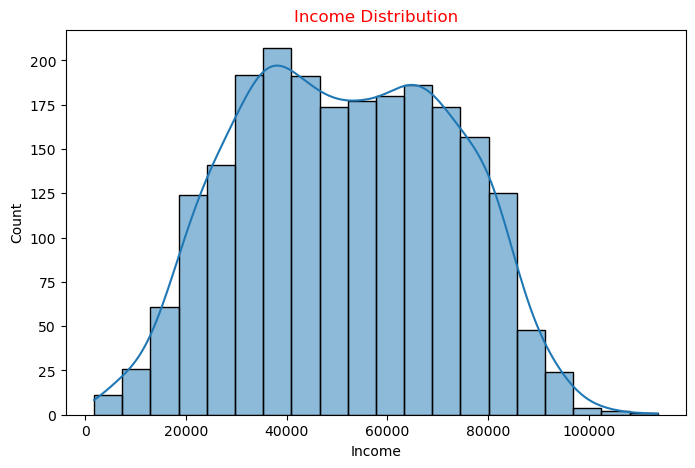

In [170]:
# Visualizing Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(x=df['Income'], bins=20, kde=True)
plt.title("Income Distribution",color="red")
plt.show()

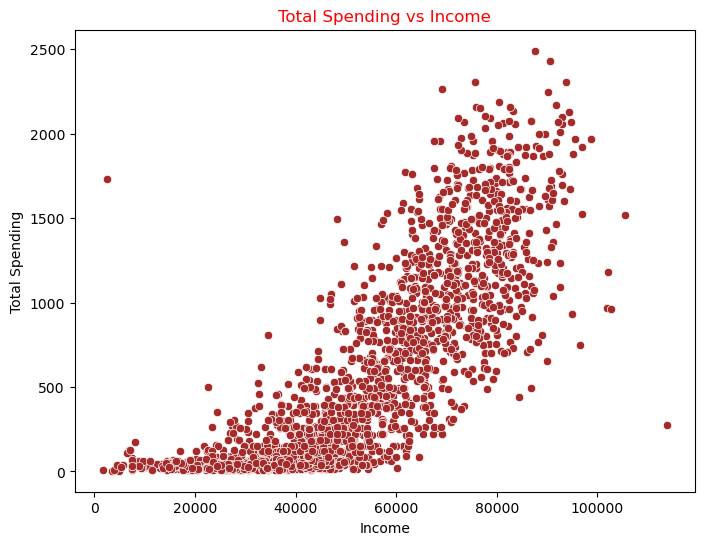

In [171]:
# Total Spending vs. Income
plt.figure(figsize=(8,6))
sns.scatterplot(color="brown",x=df['Income'], y=df['MntTotal'])
plt.title("Total Spending vs Income",color="red")
plt.xlabel("Income",color="black")
plt.ylabel("Total Spending",color="black")
plt.show()

In [172]:
# Selecting features for clustering
features = ['Income', 'MntWines', 'MntMeatProducts', 'MntTotal', 'NumWebPurchases']
X = df[features]

In [173]:
# Standardizing  data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [174]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


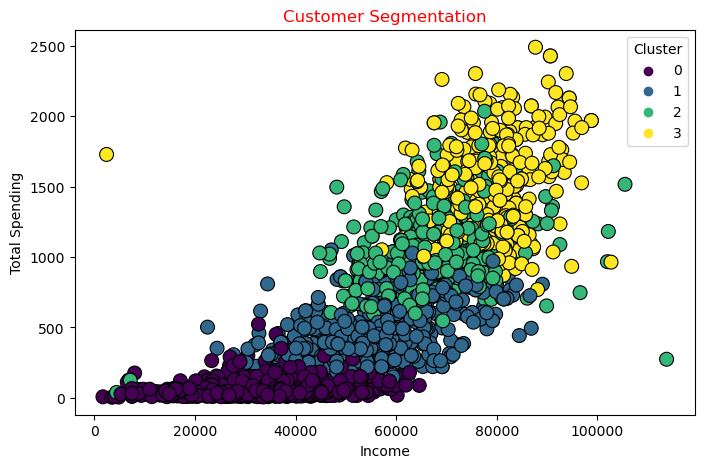

In [175]:
# Visualizing Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df['Cluster'], palette='viridis',s=100, edgecolor='black')
plt.title("Customer Segmentation",color="red")
plt.xlabel("Income",color="black")
plt.ylabel("Total Spending",color="black")
plt.show()

In [176]:
# cluster statistics
print(df.groupby('Cluster')[features].mean())


               Income    MntWines  MntMeatProducts     MntTotal  \
Cluster                                                           
0        33212.210471   33.029319        20.087958    70.573822   
1        56869.687943  282.466312       128.852837   511.257092   
2        67431.368116  723.527536       208.736232  1073.611594   
3        78506.545455  688.041056       588.392962  1509.539589   

         NumWebPurchases  
Cluster                   
0               1.898429  
1               5.308511  
2               7.811594  
3               4.516129  
